In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data= pd.read_csv('G:\DSA\Activity\Add_sales_data_2018.csv')
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [3]:
data.columns=['date','add1','add2','add3','add4','add5','profit']
data.head()

,date,add1,add2,add3,add4,add5,profit
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


# Question 1

In [4]:
data.corr().loc['add1':'add5','profit':]

,profit
add1,0.991975
add2,0.999145
add3,0.993389
add4,0.993346
add5,0.993710


<AxesSubplot:>

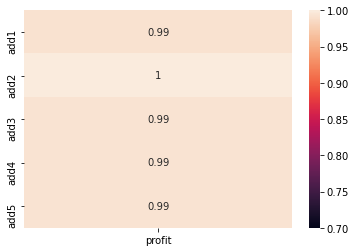

In [5]:
sns.heatmap(data.corr().loc['add1':'add5','profit':],vmin=0.7,vmax=1,annot=True)

The above table shows the relation of the expenditure for each add with the profit generated. 

It can be observed that spend for all the five add has a strong positive correlation with the profit generated.

The individual r values along with p values are printed below


In [6]:
pearsonr_coeff,p_value=pearsonr(data.add1,data.profit)
print('Pearson R Coefficient between add1 expenditure and profit is %0.4f and P-value is %0.3f' %(pearsonr_coeff,p_value))

Pearson R Coefficient between add1 expenditure and profit is 0.9920 and P-value is 0.000


In [7]:
pearsonr_coeff,p_value=pearsonr(data.add2,data.profit)
print('Pearson R Coefficient between add2 expenditure and profit is %0.4f and P-value is %0.3f' %(pearsonr_coeff,p_value))

Pearson R Coefficient between add2 expenditure and profit is 0.9991 and P-value is 0.000


In [8]:
pearsonr_coeff,p_value=pearsonr(data.add3,data.profit)
print('Pearson R Coefficient between add3 expenditure and profit is %0.4f and P-value is %0.3f' %(pearsonr_coeff,p_value))

Pearson R Coefficient between add3 expenditure and profit is 0.9934 and P-value is 0.000


In [9]:
pearsonr_coeff,p_value=pearsonr(data.add4,data.profit)
print('Pearson R Coefficient between add4 expenditure and profit is %0.4f and P-value is %0.3f' %(pearsonr_coeff,p_value))

Pearson R Coefficient between add4 expenditure and profit is 0.9933 and P-value is 0.000


In [10]:
pearsonr_coeff,p_value=pearsonr(data.add5,data.profit)
print('Pearson R Coefficient between add5 expenditure and profit is %0.4f and P-value is %0.3f' %(pearsonr_coeff,p_value))

Pearson R Coefficient between add5 expenditure and profit is 0.9937 and P-value is 0.000


# Question 2

Separating features and responses

In [11]:
X=data.drop(['date','profit'],axis=1).values
y=data[['profit']].values

Spliting to train and test sets in 80-20 proportion

In [12]:
X_train, X_test,y_train,y_test =train_test_split(X,y,random_state=43,test_size=.2)

Creating linear regression model using train set

In [13]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)

Making prediction using test set

In [14]:
pred = model.predict(X_test)
print(pred[0:6])

[[4947.72 ]
 [4480.363]
 [5001.615]
 [5013.207]
 [5043.705]
 [5078.636]]


In [15]:
print(y_test[0:6])

[[4947.72 ]
 [4480.363]
 [5001.615]
 [5013.207]
 [5043.705]
 [5078.636]]


In [16]:
print('Mean Squared Error is %f' %mean_squared_error(y_test,pred))

Mean Squared Error is 0.000000


The mean squared error is observed to be close to zero , which means that the model fits the data very closely

# Question 3

Creating a sample feature array for the add expenditures [290,312,309,298,320]

In [17]:
X_sample= np.array([290,312,309,298,320])
X_sample=X_sample.reshape(1,-1)

Making prediction using the sample case

In [18]:
predicted_profit= model.predict(X_sample)
print('The given add expenditures is expected to generate a profit of %0.3f thousand. '%predicted_profit)

The given add expenditures is expected to generate a profit of 5820.060 thousand. 
